## Observations and Insights 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mice_total = len(mouse_study_complete["Mouse ID"].unique())
mice_total

249

In [3]:
drug_names = mouse_study_complete["Drug Regimen"].unique()
drug_names

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [4]:
# Getting the duplicat mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicates.value_counts()


Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_double = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] == "g989",:]
mice_double


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = mouse_study_complete.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#grouped_city_df = loss_df.groupby(["Incident City"])

drug_groups = clean_mice_data.groupby(["Drug Regimen"])

mean_tumor = drug_groups["Tumor Volume (mm3)"].mean()
median_tumor = drug_groups["Tumor Volume (mm3)"].median()
variance_tumor = drug_groups["Tumor Volume (mm3)"].var()
SD_tumor = drug_groups["Tumor Volume (mm3)"].std()
SEM_tumor = drug_groups["Tumor Volume (mm3)"].sem()

drug_groups_df = pd.DataFrame({"Mean": mean_tumor,
                            "Median": median_tumor,
                            "Variance": variance_tumor,
                            "Standard Deviation": SD_tumor,
                            "SEM": SEM_tumor})
drug_groups_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_groups_agg = drug_groups["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"])
drug_groups_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Total Number of Timepoints'>

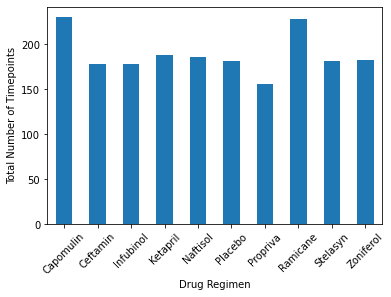

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_timpoints_df = drug_groups["Mouse ID"].count()
ax_bar = drug_timpoints_df.plot.bar(x='Drug Regimen', y='Total Number of Timepoints', rot=45)
ax_bar.set_ylabel("Total Number of Timepoints")
ax_bar


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

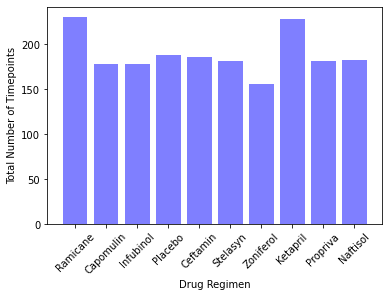

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = drug_groups["Mouse ID"].count()
x_axis = drug_names 
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.xticks(rotation=45)


In [12]:
mice_sex = clean_mice_data.groupby(["Sex"]).count()
mice_sex


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


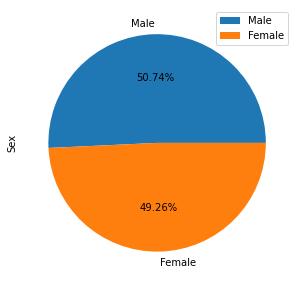

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df = pd.DataFrame({'Sex': [958, 930]},
                    index = ['Male', 'Female'])

plot = df.plot.pie(y='Sex', figsize=(5, 5), autopct='%0.2f%%')

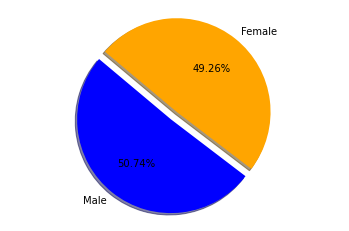

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["Male", "Female"]
sex_count = [958, 930]
colors = ["blue","orange"]
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sex_count, explode=explode, labels=sex, colors=colors,
        autopct="%0.2f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint = clean_mice_data.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [16]:
merge_max_df = pd.merge(max_timepoint, clean_mice_data, how="left", on=(["Mouse ID","Timepoint"]))
merge_max_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
#append tumor data to new list 
    tumor_vol_data.append(tumor_vol)

In [27]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    mice_regimen = merge_max_df.loc[merge_max_df["Drug Regimen"] == treatment]
    tumor_vol= mice_regimen['Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds

quartiles = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


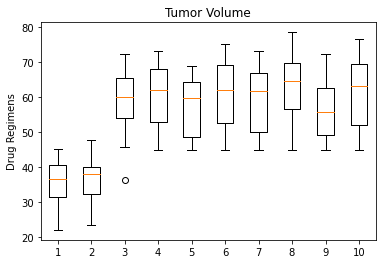

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Drug Regimens')
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis_data = np.arange(1,46,1)

cap_mice = clean_mice_data.loc[clean_mice_data["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")



Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [52]:
Mouse_w150 = clean_mice_data.loc[clean_mice_data["Mouse ID"] == "w150"]

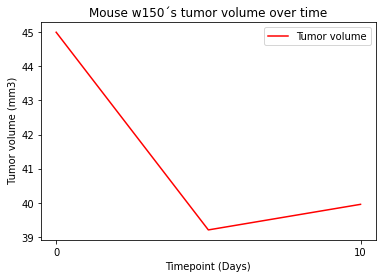

In [54]:
tumor_y = Mouse_w150["Tumor Volume (mm3)"]
time_x = Mouse_w150["Timepoint"]

# Plot our line that will be used to 
plt.plot(time_x, tumor_y, color="red", label="Tumor volume")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse w150´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()


Text(0, 0.5, 'Tumor volume (mm3)')

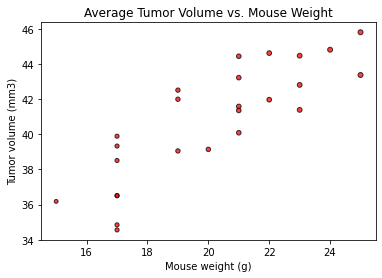

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_group =cap_mice.groupby(["Mouse ID"]).mean()
cap_group.head()
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]

plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="red", edgecolors="black",
            s=avg_tumor_vol, alpha=0.75)

#Add title and labels to scatter plot 
plt.title( "Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

## Correlation and Regression

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearson3(avg_tumor_vol, avg_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show() 


TypeError: 'rv_frozen' object is not subscriptable